<a href="https://colab.research.google.com/github/alfredwisana/deep-learning/blob/main/week%203%3A%20CNN/data_100_percent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

READ DATA

In [ ]:
(train_data, test_data), ds_info = tfds.load(name="emnist/digits",
                                             split=["train", "test"],
                                             shuffle_files=True,
                                             as_supervised=True, # Data gets returned in tuple format (data, label)
                                             with_info=True)

In [ ]:
dataset = []
for image, label in tfds.as_numpy(train_data):
  dataset.append({
      'image' : image,
      'label' : int(label)
  })

In [ ]:
import pickle

In [ ]:
with open('dataset.pkl', 'wb') as f:
    pickle.dump(dataset, f)

In [ ]:
with open('dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [ ]:
X = []
Y = []
for i in range(len(dataset)):
  X.append(tf.cast(dataset[i]['image'], tf.float32) / 255)
  Y.append(tf.one_hot(dataset[i]['label'], depth=10))

X = np.array(X)
Y = np.array(Y)

In [ ]:
with open('datax.pkl','wb') as f:
    pickle.dump(X, f)

with open('datay.pkl','wb') as f:
    pickle.dump(Y, f)

In [ ]:
with open('datax.pkl','rb') as f:
    X = pickle.load(f)
with open('datay.pkl','rb') as f:
    Y = pickle.load(f)

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

Data Pre Processing

In [ ]:
class_names = ds_info.features["label"].names
class_names

In [ ]:
tfds.as_dataframe(train_data.take(10), ds_info)

In [ ]:
tfds.show_examples(train_data, ds_info)

In [ ]:
def preprocess_image(image, label):
  # One Hot Encoding
  # 0 1 2 3 4 5 6 7 8 9
  # example 4
  # 0 0 0 0 1 0 0 0 0 0
  return tf.cast(image, tf.float32) / 255., tf.one_hot(label, depth=10)


In [ ]:
mapped_train_data = train_data.map(preprocess_image).batch(32)
mapped_test_data = test_data.map(preprocess_image).batch(32)

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs


    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

Alexnet

In [ ]:
model = keras.models.Sequential(
    [
        keras.layers.Input(shape=(28,28,1)),
        keras.layers.Conv2D(96, kernel_size=(3,3), strides=(1,1), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(256, kernel_size=(5,5), activation='relu',padding='same'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(384, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.Conv2D(384, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 26, 26, 96)        960       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 12, 12, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 12, 12, 256)       614656    
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 5, 5, 256)         0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 5, 5, 384)         885120    
                                                                 
 conv2d_40 (Conv2D)          (None, 5, 5, 384)        

In [ ]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history = model.fit(Xtrain, Ytrain,epochs=10, batch_size=16, validation_data=(Xtest,Ytest))

Epoch 1/10
12000/12000 [==============================] - 145s 12ms/step - loss: 0.1240 - accuracy: 0.9677 - val_loss: 0.0538 - val_accuracy: 0.9878
Epoch 2/10
12000/12000 [==============================] - 140s 12ms/step - loss: 0.0724 - accuracy: 0.9846 - val_loss: 0.0712 - val_accuracy: 0.9844
Epoch 3/10
12000/12000 [==============================] - 141s 12ms/step - loss: 0.0699 - accuracy: 0.9849 - val_loss: 0.0658 - val_accuracy: 0.9848
Epoch 4/10
12000/12000 [==============================] - 140s 12ms/step - loss: 0.0694 - accuracy: 0.9849 - val_loss: 0.0706 - val_accuracy: 0.9877
Epoch 5/10
12000/12000 [==============================] - 141s 12ms/step - loss: 0.0738 - accuracy: 0.9839 - val_loss: 0.0903 - val_accuracy: 0.9826
Epoch 6/10
12000/12000 [==============================] - 140s 12ms/step - loss: 0.0701 - accuracy: 0.9847 - val_loss: 0.0843 - val_accuracy: 0.9858
Epoch 7/10
12000/12000 [==============================] - 140s 12ms/step - loss: 0.0708 - accuracy: 0.9846

In [ ]:
with open('history_alexnet.pkl', 'wb') as f:
    pickle.dump(history, f)

In [ ]:
with open('history_alexnet.pkl', 'rb') as f:
    history_alexnet = pickle.load(f)

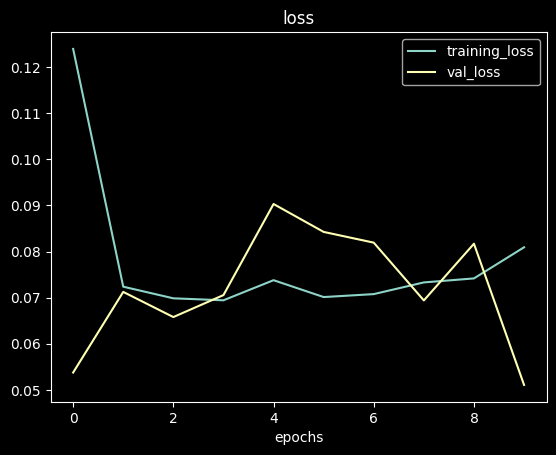

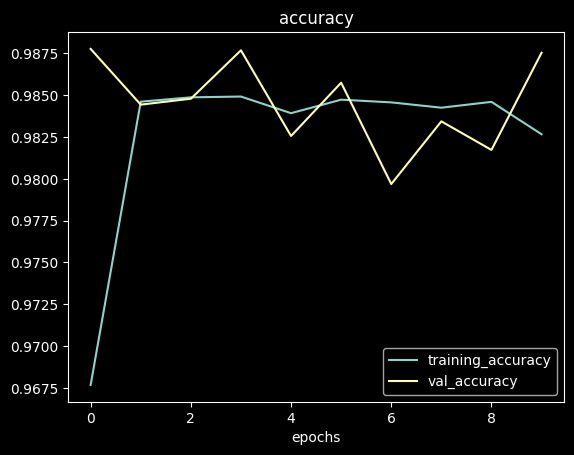

In [ ]:
plot_loss_curves(history_alexnet)

LENET

In [ ]:
model = keras.models.Sequential(
    [
      keras.layers.Input((28,28,1)),
      keras.layers.Conv2D(6, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Conv2D(16, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(120, activation='sigmoid'),
      keras.layers.Dense(84, activation='sigmoid'),
      keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 12, 12, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 4, 4, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 120)              

In [ ]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history = model.fit(Xtrain, Ytrain,epochs=10, batch_size=16, validation_data=(Xtest,Ytest))

Epoch 1/10
12000/12000 [==============================] - 70s 6ms/step - loss: 0.1840 - accuracy: 0.9443 - val_loss: 0.0551 - val_accuracy: 0.9838
Epoch 2/10
12000/12000 [==============================] - 66s 6ms/step - loss: 0.0447 - accuracy: 0.9866 - val_loss: 0.0403 - val_accuracy: 0.9883
Epoch 3/10
12000/12000 [==============================] - 66s 5ms/step - loss: 0.0336 - accuracy: 0.9899 - val_loss: 0.0396 - val_accuracy: 0.9882
Epoch 4/10
12000/12000 [==============================] - 66s 6ms/step - loss: 0.0277 - accuracy: 0.9918 - val_loss: 0.0294 - val_accuracy: 0.9914
Epoch 5/10
12000/12000 [==============================] - 67s 6ms/step - loss: 0.0242 - accuracy: 0.9926 - val_loss: 0.0317 - val_accuracy: 0.9909
Epoch 6/10
12000/12000 [==============================] - 66s 6ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0296 - val_accuracy: 0.9915
Epoch 7/10
12000/12000 [==============================] - 66s 5ms/step - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0

In [ ]:
with open('history_lenet.pkl', 'wb') as f:
    pickle.dump(history, f)

In [ ]:
with open('history_lenet.pkl', 'rb') as f:
    history_lenet = pickle.load(f)

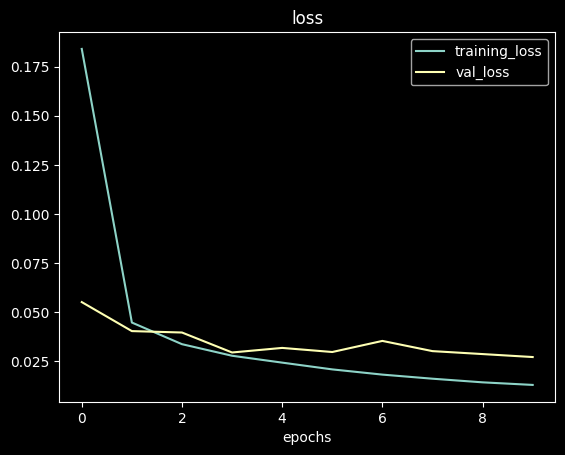

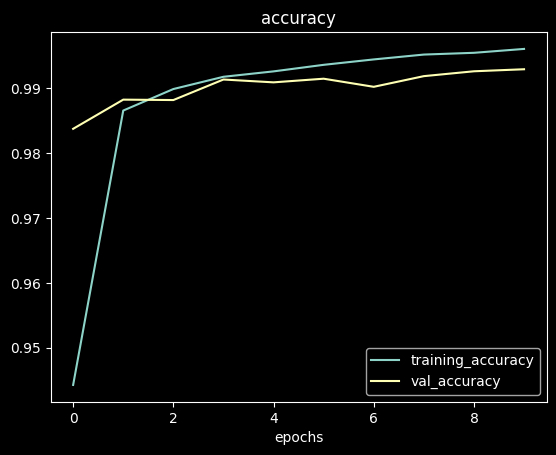

In [ ]:
plot_loss_curves(history_lenet)

CUSTOM MODEL